# KNN Classification with Cross Validation

### Importing libraries for implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\samid\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Importing Data Set

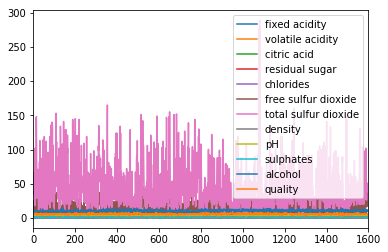

In [3]:
df = pd.read_csv('C:/Users/samid/Desktop/course/ML & Stat/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.plot()
plt.show()

### Splitting data into training set & testing test

In [73]:
#  Predictor X and target response y
x = np.array(df.ix[:,0:11]) # all predictors
y = np.array(df['quality']) # reponse

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state = 42)

### Knn classifier

In [88]:
# create model with k = 25
knn = KNeighborsClassifier(n_neighbors=25)

# fitting the model
knn.fit(X_train, y_train)

# predicting the response
pred = knn.predict(X_test)

# evaluate accuracy from sklearn
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred))

0.492424242424


In [75]:
#Classification matrix
print (metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        19
          5       0.51      0.66      0.57       217
          6       0.45      0.48      0.47       213
          7       0.33      0.09      0.14        70
          8       0.00      0.00      0.00         7

avg / total       0.43      0.48      0.44       528



C:\Users\samid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
#Confusion matrix
print (metrics.confusion_matrix(y_test, pred))

[[  0   0   1   0   1   0]
 [  0   0   6  12   1   0]
 [  0   0 143  71   3   0]
 [  0   0  96 112   5   0]
 [  0   0  22  43   5   0]
 [  0   0   1   6   0   0]]


### To find accuracy of k values for 1 - 100

In [90]:
#range to validate k
range_for_k = range(1,100)

# empty list that will hold cv scores
cv_scores = []

# perform 8-fold cross validation
for k in range_for_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())
    
cv_scores


[0.55764082351537414,
 0.51560290462389646,
 0.4995630550423098,
 0.49956224197964494,
 0.50526455875923482,
 0.49593578491749946,
 0.49031732205130008,
 0.49686232519114781,
 0.50152010484018328,
 0.5191623901997553,
 0.5146706831507234,
 0.51455349935648209,
 0.52766321444203168,
 0.52673830939516053,
 0.52674368797154791,
 0.52963204227173466,
 0.52400036486187085,
 0.53332253143177388,
 0.5389197541735371,
 0.54362540174927998,
 0.53053733331949915,
 0.53513992861552517,
 0.53046161799652314,
 0.53511208121925669,
 0.53140125980419328,
 0.5201921814680629,
 0.51927265499757913,
 0.52111749304626631,
 0.52023354603113314,
 0.52124148282728222,
 0.52675008742699003,
 0.52109736860763234,
 0.52203670779216504,
 0.52674348015515782,
 0.52295623426264881,
 0.52209209996156458,
 0.52294881392815173,
 0.51274848545083518,
 0.5109027304312882,
 0.51091624759809007,
 0.5118776490711715,
 0.52494620741004083,
 0.51557474550304283,
 0.51285154683199985,
 0.5127766445716887,
 0.518360860586177

### Calculate MSE

In [91]:
MSE = [1 - x for x in cv_scores]

MSE

[0.44235917648462586,
 0.48439709537610354,
 0.5004369449576902,
 0.50043775802035506,
 0.49473544124076518,
 0.50406421508250054,
 0.50968267794869992,
 0.50313767480885219,
 0.49847989515981672,
 0.4808376098002447,
 0.4853293168492766,
 0.48544650064351791,
 0.47233678555796832,
 0.47326169060483947,
 0.47325631202845209,
 0.47036795772826534,
 0.47599963513812915,
 0.46667746856822612,
 0.4610802458264629,
 0.45637459825072002,
 0.46946266668050085,
 0.46486007138447483,
 0.46953838200347686,
 0.46488791878074331,
 0.46859874019580672,
 0.4798078185319371,
 0.48072734500242087,
 0.47888250695373369,
 0.47976645396886686,
 0.47875851717271778,
 0.47324991257300997,
 0.47890263139236766,
 0.47796329220783496,
 0.47325651984484218,
 0.47704376573735119,
 0.47790790003843542,
 0.47705118607184827,
 0.48725151454916482,
 0.4890972695687118,
 0.48908375240190993,
 0.4881223509288285,
 0.47505379258995917,
 0.48442525449695717,
 0.48714845316800015,
 0.4872233554283113,
 0.481639139413822

### Determining optimal k

In [92]:
# determining best k
optimal_k = range_for_k[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


### Plotting error against k

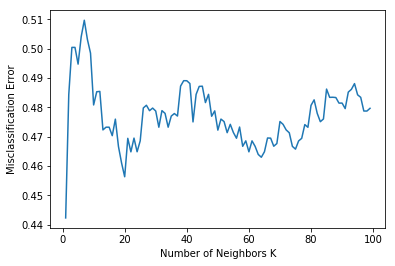

In [93]:
# plot misclassification error vs k
plt.plot(range_for_k, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

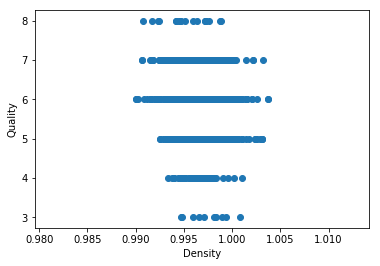

In [60]:

plt.scatter(df.density,df.quality)
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
5       3.51
6       3.30
7       3.39
8       3.36
9       3.35
10      3.28
11      3.35
12      3.58
13      3.26
14      3.16
15      3.17
16      3.30
17      3.11
18      3.38
19      3.04
20      3.39
21      3.52
22      3.17
23      3.17
24      3.43
25      3.34
26      3.28
27      3.17
28      3.47
29      3.38
        ... 
1569    3.48
1570    3.37
1571    3.44
1572    3.33
1573    3.58
1574    3.39
1575    3.26
1576    3.30
1577    3.54
1578    3.42
1579    3.54
1580    3.36
1581    3.54
1582    3.57
1583    3.33
1584    3.29
1585    3.30
1586    3.34
1587    3.55
1588    3.27
1589    3.29
1590    3.32
1591    3.67
1592    3.42
1593    3.42
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64